In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [3]:
df.shape

(3554, 18)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159


In [8]:
latlong = pd.read_csv('latlong.csv')

In [9]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [10]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [11]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [12]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [13]:
new_df = df.merge(latlong, on='sector')

In [14]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,New Property,...,0,0,0,0,0,0,8,"28.4160° N, 76.9914° E",28.4160,76.9914
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,New Property,...,1,1,0,0,0,0,38,"28.4253° N, 76.9439° E",28.4253,76.9439
2,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,Relatively New,...,0,1,0,0,1,1,174,"28.4079° N, 76.9153° E",28.4079,76.9153
3,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,Relatively New,...,0,0,1,0,0,0,159,"28.4750° N, 76.9715° E",28.4750,76.9715
4,flat,paras quartier,gwal pahari,7.50,14019.0,4,4,3+,20.0,New Property,...,0,1,0,1,1,1,49,"28.4484° N, 77.0210° E",28.4484,77.0210


In [15]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [16]:
import pandas as pd
import numpy as np

# Assuming new_df is your DataFrame
# Convert columns to numeric, setting errors='coerce' to handle non-numeric data
new_df['price'] = pd.to_numeric(new_df['price'], errors='coerce')
new_df['price_per_sqft'] = pd.to_numeric(new_df['price_per_sqft'], errors='coerce')
new_df['built_up_area'] = pd.to_numeric(new_df['built_up_area'], errors='coerce')
new_df['latitude'] = pd.to_numeric(new_df['latitude'], errors='coerce')
new_df['longitude'] = pd.to_numeric(new_df['longitude'], errors='coerce')

# Group by 'sector' and calculate the mean for the specified columns
group_df = new_df.groupby('sector').agg({
    'price': np.mean,
    'price_per_sqft': np.mean,
    'built_up_area': np.mean,
    'latitude': np.mean,
    'longitude': np.mean
})

group_df

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_11964\463600992.py:13: FutureWarning: The provided callable <function mean at 0x0000015ADC32EDE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  group_df = new_df.groupby('sector').agg({
C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_11964\463600992.py:13: FutureWarning: The provided callable <function mean at 0x0000015ADC32EDE0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  group_df = new_df.groupby('sector').agg({


,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [17]:
group_df.head(3)

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456


In [18]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [19]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [20]:
new_df.to_csv('data_viz1.csv',index=False)

In [21]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [22]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,4 Bedroom House for sale in DLF Phase 1,house,dlf city plots,12.50,38580.0,3240.0,Plot area 360(301.01 sq.m.),4,5,2,"servant room,study room","Def108, DLF Phase 1, Gurgaon, Haryana",2.0,North-East,5 to 10 Year Old,"['Phase 2 Metro Station', 'Grand Mall', 'Jacar...","4 bhk park facing, north east facing at very p...","['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Ge...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
1,3 BHK Flat in Sector 37C Gurgaon,flat,imperia the esfera,0.99,5454.0,1815.0,Super Built up area 1815(168.62 sq.m.)Built Up...,3,5,3+,servant room,"E 505, Sector 37C Gurgaon, Gurgaon, Haryana",5.0,North-West,1 to 5 Year Old,"['Approved Sector 37 Mero Station', 'Esplanade...",Come live in a locale where all your day-To-Da...,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
2,3 BHK Flat in Sector 84 Gurgaon,flat,alpha corp gurgaonone,1.49,7590.0,1963.0,Super Built up area 1963(182.37 sq.m.)Carpet a...,3,3,3,servant room,"Sector 84 Gurgaon, Gurgaon, Haryana",6.0,South-East,1 to 5 Year Old,"['Delhi Public School', 'Raheja Market', 'Sapp...",Alpha corp gurgaonone 84 is one of gurgaon's m...,NaN,"['Intercom Facility', 'Lift(s)', 'Maintenance ...","['Green Area5 out of 5', 'Construction5 out of..."
3,1 Bedroom House for sale in Sector 110 Gurgaon,house,independent,0.34,6800.0,500.0,Built Up area: 500 (46.45 sq.m.),1,1,0,not available,"Nihali Colony, Sector 110, Gurgaon, Sector 110...",1.0,NaN,undefined,"['Palam Vihar Vyapar kendra', 'Palam triangle'...",One of the finest property in sector 110 is no...,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5..."
4,4 BHK Flat in Sector 82A Gurgaon,flat,vatika sovereign next sector-82 a gurgaon,2.91,6700.0,4343.0,Super Built up area 4350(404.13 sq.m.)Carpet a...,4,4,3,"study room,servant room,store room","Tower - K, Sector 82A Gurgaon, Gurgaon, Haryana",6.0,East,Under Construction,"['S.R.S. Hospital and Critical Care Unit', 'Or...",Penthouse prime location vatika sovereign next...,"['4 Wardrobe', '1 Exhaust Fan', '1 Modular Kit...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment5 out of 5', 'Safety5 out of 5', ..."


In [23]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [24]:
wordcloud_df.head()

,features,sector
0,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 36
1,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 89
2,"['Intercom Facility', 'Lift(s)', 'Maintenance ...",sohna road
3,NaN,sector 92
4,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 102


In [25]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [26]:
main

['Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Recently Renovated',
 'Visitor Parking',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Park',
 'Visitor Parking',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club

In [27]:
from wordcloud import WordCloud

In [28]:
feature_text = ' '.join(main)

In [29]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [30]:
feature_text

'Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Recently Renovated Visitor Parking Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Club house / Community Center Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Intercom Facility Lift(s) Maintenance Staff Park Visitor Parking Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Water Storage Visitor Parking Swimming Pool Park Shopping Centre Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house / Community Center Water softening plant Private Garden / Terrace High Ceiling Height Maintenance Staff Water Storage Park Recently Renovated Bank Attached Property Visitor Parki

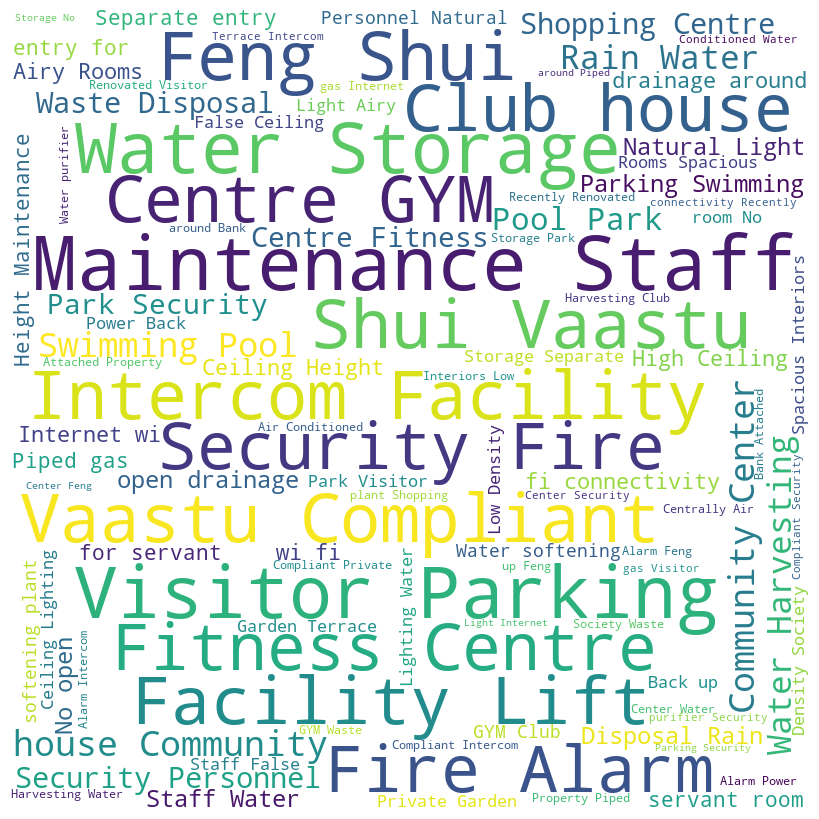

In [31]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [32]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [33]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [34]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [35]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_11964\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\DESKTOP\anaconda3\envs\DSMP_Project\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DESKTOP\AppData\Local\Temp\ipykernel_11964\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms

<Axes: xlabel='price', ylabel='Density'>

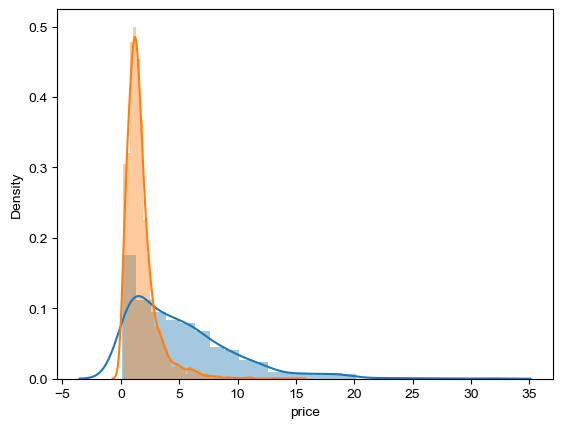

In [36]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [37]:
new_df['sector'].unique().tolist().insert(0,'overall')